**Common data prepare tool for Time-Series**
- datetime.timedelta 
- datetime.datetime
others:
- df.sort_values() & DataFrame.set_index() 
> sort df by datetime column 
>
> set that column as the index.
- df.groupby('sale_date').sum().asfreq('12H')
- df.resample('2D').aggregate(np.mean)
- select a range of dates w/ indexed datetime col: 
```python 
df['2013-12-29':'2014-01-01']```
-  df.assign(): assign new columns to a dataframe. 
- fill missing values: 
> df.ffill()/df.fillna(method='ffill') #foward fill 
>
> df.bfill() #backward fill 


In [13]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np

%matplotlib inline
# ignore warnings
# import warnings
# warnings.filterwarnings("ignore")
import acquire
import summarize
from acquire import get_store_data
from summarize import df_summary

# Data acquisition

In [15]:
df = acquire.get_all_data()
df.head()

,item_id,sale_amount,sale_date,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


# Data summary

In [16]:
summarize.df_summary(df)

--- Shape: (913000, 14)
--- Info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 14 columns):
item_id          913000 non-null int64
sale_amount      913000 non-null float64
sale_date        913000 non-null object
sale_id          913000 non-null int64
store_id         913000 non-null int64
item_brand       913000 non-null object
item_name        913000 non-null object
item_price       913000 non-null float64
item_upc12       913000 non-null int64
item_upc14       913000 non-null int64
store_address    913000 non-null object
store_city       913000 non-null object
store_state      913000 non-null object
store_zipcode    913000 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 104.5+ MB
--- Descriptions
              item_id    sale_amount                      sale_date  \
count   913000.000000  913000.000000                         913000   
unique            NaN            NaN                           1826   
top   

NameError: name 'pd' is not defined

# Explore target variable and set as index

## Change target variable into standard time format

In [17]:
df['sale_date'] = pd.to_datetime(df['sale_date'])

Generate a quick plot of **target variable over time**, the variable we wish to forecast or predict. 

We will first aggregate the sale_amount by sale_date using sum(), i.e. group by sale_date and sum the sale_amount. 

We will then do a quick plot of this aggregated data.

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


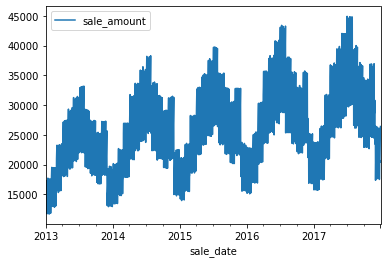

In [18]:
by_date = df.groupby(['sale_date'])['sale_amount'].sum().reset_index()
by_date.plot(x='sale_date', y='sale_amount')

## Explore gap in target time

**Explore Our Dates**
- nunique() to count distinct values (in this case is days)
- .min() to find the earliest datetime
- .max() to find the most recent datetime
- datetime.timedelta to compute the datediff or length of time between 2 datetimes. 
> **We will use datetime.timedelta to determine if there are dates missing from our dataframe**
- df.index.nunique(), NOT df.sale_date.nunique(), because we have set the sale date to be the index, so it is no longer a column.

In [26]:
df = df.set_index('sale_date')

In [27]:
df.head()

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-01-02 00:00:00+00:00,1,11.0,2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-01-03 00:00:00+00:00,1,14.0,3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-01-04 00:00:00+00:00,1,13.0,4,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-01-05 00:00:00+00:00,1,10.0,5,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


In [28]:
df.index.nunique()

1826

In [29]:
# first/ earliest sale date
df.index.min()

Timestamp('2013-01-01 00:00:00+0000', tz='UTC')

In [30]:
# last/ most recent sale date
df.index.max()

Timestamp('2017-12-31 00:00:00+0000', tz='UTC')

In [ ]:
# 2 ways to calc if there's any missing date
# By running this little test, we can conclude that there are 1826 days, 
# beginning 2013-01-01 and ending 2017-12-31, with no gaps in days.

In [31]:
df.index.max() - df.index.min() + timedelta(days=1)

Timedelta('1826 days 00:00:00')

In [32]:
timedelta(df.index.nunique())

datetime.timedelta(days=1826)

# Explore store data

In [33]:
df.store_id.nunique()

10

In [34]:
df.store_id.value_counts()

10    91300
9     91300
8     91300
7     91300
6     91300
5     91300
4     91300
3     91300
2     91300
1     91300
Name: store_id, dtype: int64

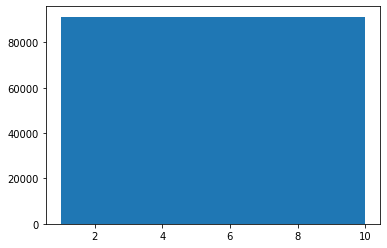

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(df.store_id)
plt.show()
# 10 different stores and each one has 91,300 item sales

# Explore Item Sales

In [36]:
# how many unique items are sold across all of the stores and all of the dates.
df.item_id.nunique()

50

In [39]:
# Number of observations per item
df.item_id.value_counts(sort=False).describe()
# 50 different items and there were 18,260 sales for each item

count       50.0
mean     18260.0
std          0.0
min      18260.0
25%      18260.0
50%      18260.0
75%      18260.0
max      18260.0
Name: item_id, dtype: float64

# Explore Stores + Items

In [40]:
# First sale date for each store/item combination
first_sale_per_storeitem = df.reset_index().groupby(['store_id','item_id']).sale_date.min()
first_sale_per_storeitem[0:5]

store_id  item_id
1         1         2013-01-01 00:00:00+00:00
          2         2013-01-01 00:00:00+00:00
          3         2013-01-01 00:00:00+00:00
          4         2013-01-01 00:00:00+00:00
          5         2013-01-01 00:00:00+00:00
Name: sale_date, dtype: datetime64[ns, UTC]

In [41]:
# is Jan 1, 2013 the first date for all store/item combinations?
# get the unique dates from first_sale_per_storeitem
first_sale_per_storeitem.unique()
# YES, the first sale for each store/item in this dataset is tagged on Jan 1, 2013

<DatetimeArray>
['2013-01-01 00:00:00+00:00']
Length: 1, dtype: datetime64[ns, UTC]

In [42]:
# Last sale date for each store/item combination

last_sale_per_storeitem = df.reset_index().groupby(['store_id','item_id']).sale_date.max()
last_sale_per_storeitem[0:5]

store_id  item_id
1         1         2017-12-31 00:00:00+00:00
          2         2017-12-31 00:00:00+00:00
          3         2017-12-31 00:00:00+00:00
          4         2017-12-31 00:00:00+00:00
          5         2017-12-31 00:00:00+00:00
Name: sale_date, dtype: datetime64[ns, UTC]

In [45]:
# Is Dec 31, 2107 the last date for all store/item combinations?
last_sale_per_storeitem.unique()
# Yes

<DatetimeArray>
['2017-12-31 00:00:00+00:00']
Length: 1, dtype: datetime64[ns, UTC]

In [47]:
# On how many different days was each item sold at each store?

days_per_storeitem = df.reset_index().groupby(['store_id','item_id']).sale_date.nunique()
days_per_storeitem[0:5]

store_id  item_id
1         1          1826
          2          1826
          3          1826
          4          1826
          5          1826
Name: sale_date, dtype: int64

In [49]:
days_per_storeitem.unique()
# did every store sell at least one of every item on every day in the data's time span?

array([1826])

In [51]:
days_per_storeitem.nunique()

1

# Prepare Dates

In [52]:
# select single/ specific date
# referencing by date

df.loc['2013-02-28']

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
sale_date,,,,,,,,,,,,,
2013-02-28 00:00:00+00:00,1,10.0,59,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-02-28 00:00:00+00:00,2,35.0,18319,1,Caress,Caress Velvet Bliss Ultra Silkening Beauty Bar...,6.44,11111065925,11111065925,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-02-28 00:00:00+00:00,3,24.0,36579,1,Earths Best,Earths Best Organic Fruit Yogurt Smoothie Mixe...,2.43,23923330139,23923330139,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-02-28 00:00:00+00:00,4,14.0,54839,1,Boars Head,Boars Head Sliced White American Cheese - 120 Ct,3.14,208528800007,208528800007,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-02-28 00:00:00+00:00,5,12.0,73099,1,Back To Nature,Back To Nature Gluten Free White Cheddar Rice ...,2.61,759283100036,759283100036,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-02-28 00:00:00+00:00,6,26.0,91359,1,Sally Hansen,Sally Hansen Nail Color Magnetic 903 Silver El...,6.93,74170388732,74170388732,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-02-28 00:00:00+00:00,7,28.0,109619,1,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-02-28 00:00:00+00:00,8,41.0,127879,1,Lea & Perrins,Lea & Perrins Marinade In-a-bag Cracked Pepper...,1.68,51600080015,51600080015,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-02-28 00:00:00+00:00,9,27.0,146139,1,Van De Kamps,Van De Kamps Fillets Beer Battered - 10 Ct,1.79,19600923015,19600923015,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


In [59]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [61]:
# referencing range
df.loc['2013-12-29':'2014-01-01'].head()

TypeError: Cannot compare tz-naive and tz-aware datetime-like objects

In [53]:
# specific month/ provide partial date info
#.sample(n, random_state = 0) give a sample of size n
df.loc['2015-05'].sample(5, random_state=0)

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
sale_date,,,,,,,,,,,,,
2015-05-27 00:00:00+00:00,22,93.0,386163,2,Betty Crocker,Betty Crocker Twin Pack Real Potatoes Scallope...,7.31,16000288829,16000288829,9255 FM 471 West,San Antonio,TX,78251
2015-05-19 00:00:00+00:00,30,63.0,543191,8,Petmate,Petmate Booda Bones Steak Bacon & Chicken Flav...,8.39,723503568678,723503568678,15000 San Pedro Ave,San Antonio,TX,78232
2015-05-15 00:00:00+00:00,24,96.0,433627,8,Smart Living,Smart Living Charcoal Lighter Fluid,5.34,688267084225,688267084225,15000 San Pedro Ave,San Antonio,TX,78232
2015-05-12 00:00:00+00:00,14,79.0,241894,3,Pamprin,Pamprin Maximum Strength Multi-symptom Menstru...,7.54,41167300121,41167300121,2118 Fredericksburg Rdj,San Antonio,TX,78201
2015-05-13 00:00:00+00:00,6,49.0,92163,1,Sally Hansen,Sally Hansen Nail Color Magnetic 903 Silver El...,6.93,74170388732,74170388732,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


In [62]:
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Weekday Name'] = df.index.weekday_name

# Display a random sampling of 5 rows
df.sample(5, random_state=0)

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,Year,Month,Weekday Name
sale_date,,,,,,,,,,,,,,,,
2017-07-14 00:00:00+00:00,34,42.0,609714,4,Halls,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694,516 S Flores St,San Antonio,TX,78204,2017,7,Friday
2015-05-19 00:00:00+00:00,46,43.0,833525,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217,2015,5,Tuesday
2014-05-01 00:00:00+00:00,1,17.0,7790,5,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1520 Austin Hwy,San Antonio,TX,78218,2014,5,Thursday
2016-11-06 00:00:00+00:00,27,38.0,481644,4,Morton,Morton Kosher Salt Coarse,6.01,24600017008,24600017008,516 S Flores St,San Antonio,TX,78204,2016,11,Sunday
2013-02-02 00:00:00+00:00,34,18.0,604439,2,Halls,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694,9255 FM 471 West,San Antonio,TX,78251,2013,2,Saturday


In [63]:
# forcast sales across all stores and items (so not grouping by stores or items).
# We will group by sale_date and sum sale_amount, 
# so that each sale_date has a total sales amount.

df.groupby(['sale_date']).sale_amount.sum().head()

sale_date
2013-01-01 00:00:00+00:00    13696.0
2013-01-02 00:00:00+00:00    13678.0
2013-01-03 00:00:00+00:00    14488.0
2013-01-04 00:00:00+00:00    15677.0
2013-01-05 00:00:00+00:00    16237.0
Name: sale_amount, dtype: float64

### Resample

Resampling allows us to redefine the frequency of our data. 
For example, we can change the time period window to every 12 hours or to every 2 days.

#### DOWN-SAMPLING

for example,resample to every 12 hours:

You will notice that every other row is a NaN. 
This is because we are down-sampling, i.e. we are creating more datapoints than we original had.

**need to fillna by either forward or backward filling**

df2 = df.groupby('sale_date').sale_amount.sum().asfreq('12H')
df2.head()

In [66]:
# resample and fill null values created as a result
df2.asfreq('12H').ffill().head()

sale_date
2013-01-01 00:00:00+00:00    13696.0
2013-01-01 12:00:00+00:00    13696.0
2013-01-02 00:00:00+00:00    13678.0
2013-01-02 12:00:00+00:00    13678.0
2013-01-03 00:00:00+00:00    14488.0
Freq: 12H, Name: sale_amount, dtype: float64

#### UP-SAMPLING
for example:
Resample to every 2 days

In [67]:
df3 = df.groupby('sale_date').sale_amount.sum().asfreq('2D')
df3.head()

sale_date
2013-01-01 00:00:00+00:00    13696.0
2013-01-03 00:00:00+00:00    14488.0
2013-01-05 00:00:00+00:00    16237.0
2013-01-07 00:00:00+00:00    11769.0
2013-01-09 00:00:00+00:00    13878.0
Freq: 2D, Name: sale_amount, dtype: float64

In [68]:
# we could also do np.min, np.mean, np.max, etc

df.sale_amount.resample('2D').aggregate(np.sum).head()

sale_date
2013-01-01 00:00:00+00:00    27374.0
2013-01-03 00:00:00+00:00    30165.0
2013-01-05 00:00:00+00:00    33528.0
2013-01-07 00:00:00+00:00    25329.0
2013-01-09 00:00:00+00:00    28520.0
Freq: 2D, Name: sale_amount, dtype: float64

In [69]:
# Resample at the start of each month (MS), taking the mean of each month.

df2.resample('MS').mean().head()

sale_date
2013-01-01 00:00:00+00:00    14674.322581
2013-02-01 00:00:00+00:00    16407.750000
2013-03-01 00:00:00+00:00    19915.548387
2013-04-01 00:00:00+00:00    22742.466667
2013-05-01 00:00:00+00:00    24620.709677
Freq: MS, Name: sale_amount, dtype: float64

#### Handle missing value, emphasize result from resample
1. fillna(method='pad') or fillna(method='ffill')
2. fill backward:
```python
df.groupby('sale_date').sale_amount.sum().asfreq('12H').fillna(method='bfill')```

In [70]:
df2.fillna(0, inplace=True)
df2.head()
# doesn't really make sense to fillna with zero

sale_date
2013-01-01 00:00:00+00:00    13696.0
2013-01-01 12:00:00+00:00        0.0
2013-01-02 00:00:00+00:00    13678.0
2013-01-02 12:00:00+00:00        0.0
2013-01-03 00:00:00+00:00    14488.0
Freq: 12H, Name: sale_amount, dtype: float64

In [71]:
# 1. As we did above, sum sales by day, resample to 12H, fillna with 0
df2 = df.groupby('sale_date').sale_amount.sum().asfreq('12H').fillna(0)
df2.head()

sale_date
2013-01-01 00:00:00+00:00    13696.0
2013-01-01 12:00:00+00:00        0.0
2013-01-02 00:00:00+00:00    13678.0
2013-01-02 12:00:00+00:00        0.0
2013-01-03 00:00:00+00:00    14488.0
Freq: 12H, Name: sale_amount, dtype: float64

In [72]:
# 2. Resample back to daily by taking the average value over the 2 12H timestamps for each day
df2 = df2.resample('1D').mean()
df2.head()

sale_date
2013-01-01 00:00:00+00:00    6848.0
2013-01-02 00:00:00+00:00    6839.0
2013-01-03 00:00:00+00:00    7244.0
2013-01-04 00:00:00+00:00    7838.5
2013-01-05 00:00:00+00:00    8118.5
Freq: D, Name: sale_amount, dtype: float64

In [73]:
# 3. Resample back to 12H using asfreq('12H')
df2 = df2.asfreq('12H')
df2.head()

sale_date
2013-01-01 00:00:00+00:00    6848.0
2013-01-01 12:00:00+00:00       NaN
2013-01-02 00:00:00+00:00    6839.0
2013-01-02 12:00:00+00:00       NaN
2013-01-03 00:00:00+00:00    7244.0
Freq: 12H, Name: sale_amount, dtype: float64

In [74]:
# 4. Fill missing values using forward fill method `fillna(method=ffill)` 
df2.fillna(method='ffill').head()

sale_date
2013-01-01 00:00:00+00:00    6848.0
2013-01-01 12:00:00+00:00    6848.0
2013-01-02 00:00:00+00:00    6839.0
2013-01-02 12:00:00+00:00    6839.0
2013-01-03 00:00:00+00:00    7244.0
Freq: 12H, Name: sale_amount, dtype: float64

In [75]:
# finally, put all together
df2 = df.groupby('sale_date').sale_amount.sum().asfreq('12H').fillna(0)
df2 = df2.resample('1D').mean().asfreq('12H').fillna(method='ffill')
df2.head()

sale_date
2013-01-01 00:00:00+00:00    6848.0
2013-01-01 12:00:00+00:00    6848.0
2013-01-02 00:00:00+00:00    6839.0
2013-01-02 12:00:00+00:00    6839.0
2013-01-03 00:00:00+00:00    7244.0
Freq: 12H, Name: sale_amount, dtype: float64